In [1998]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'clean_airbnb_df.csv'
df = pd.read_csv(url)

In [1999]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit,0)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit,0)
    
columns = ["accommodates",
           "bathrooms",
           "beds",
           "price",
          'availability_365',
          'number_of_reviews',
           'review_scores_rating']
for col in columns:
    replace_with_thresholds(df, col)

In [2000]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [2001]:
numericals_df = numericals_df.drop(['Unnamed: 0', 'id'], axis=1)
numericals_df

,latitude,longitude,accommodates,bathrooms,beds,price,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,19.411620,-99.177940,14,5.5,8,18000,365,64,2,0,4.58,4.56,4.48,13,4,2
1,19.429101,-99.160763,2,1.5,1,3350,89,221,9,0,4.90,4.94,4.89,1,1,0
2,19.483210,-99.112410,2,1.0,1,339,86,6,0,0,4.83,5.00,4.67,1,0,1
3,19.432210,-99.157080,2,1.5,2,1273,329,22,0,0,4.67,4.82,4.59,1,1,0
4,19.428330,-99.176340,2,2.0,2,1002,115,99,12,1,4.90,4.93,4.92,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22248,19.353846,-99.188829,3,1.0,1,1190,264,2,2,2,5.00,5.00,5.00,1,1,0
22249,19.381699,-99.147539,2,1.0,1,309,265,1,1,1,5.00,5.00,5.00,82,44,37
22250,19.408275,-99.178640,10,2.0,8,2397,358,1,1,1,5.00,5.00,5.00,23,23,0
22251,19.426772,-99.155600,2,1.0,1,850,36,1,1,1,5.00,5.00,5.00,2,1,1


## Categorical

In [2002]:
categoricals_df = categoricals_df.drop(['property_type'], axis=1)

categoricals_df

,superhost,neighbourhood,room_type
0,f,Cuauhtémoc,Entire home/apt
1,t,Cuauhtémoc,Entire home/apt
2,f,Gustavo A. Madero,Private room
3,f,Cuauhtémoc,Entire home/apt
4,t,Miguel Hidalgo,Entire home/apt
...,...,...,...
22248,t,Álvaro Obregón,Entire home/apt
22249,f,Benito Juárez,Entire home/apt
22250,t,Cuauhtémoc,Entire home/apt
22251,f,Cuauhtémoc,Private room


In [2003]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['superhost', 'neighbourhood', 'room_type']
nominal_df = categoricals_df[nominal_columns]

In [2004]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,neighbourhood_Milpa Alta,neighbourhood_Tlalpan,neighbourhood_Tláhuac,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22248,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
22249,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22250,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22251,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2005]:
# Concat the two categorical Dataframes

result_categorical_df = con_norminals_df
result_categorical_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,neighbourhood_Milpa Alta,neighbourhood_Tlalpan,neighbourhood_Tláhuac,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22248,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
22249,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22250,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22251,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Numberical

### Concat both

In [2006]:
final_df = pd.concat([result_categorical_df, numericals_df], axis=1)
final_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,1,0,0,0,0,0,1,0,0,0,...,365,64,2,0,4.58,4.56,4.48,13,4,2
1,0,1,0,0,0,0,1,0,0,0,...,89,221,9,0,4.90,4.94,4.89,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,86,6,0,0,4.83,5.00,4.67,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,329,22,0,0,4.67,4.82,4.59,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,115,99,12,1,4.90,4.93,4.92,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22248,0,1,0,0,0,0,0,0,0,0,...,264,2,2,2,5.00,5.00,5.00,1,1,0
22249,1,0,0,1,0,0,0,0,0,0,...,265,1,1,1,5.00,5.00,5.00,82,44,37
22250,0,1,0,0,0,0,1,0,0,0,...,358,1,1,1,5.00,5.00,5.00,23,23,0
22251,1,0,0,0,0,0,1,0,0,0,...,36,1,1,1,5.00,5.00,5.00,2,1,1


### X-y Splitt

In [2007]:
final_df.columns

Index(['superhost_f', 'superhost_t', 'neighbourhood_Azcapotzalco',
       'neighbourhood_Benito Juárez', 'neighbourhood_Coyoacán',
       'neighbourhood_Cuajimalpa de Morelos', 'neighbourhood_Cuauhtémoc',
       'neighbourhood_Gustavo A. Madero', 'neighbourhood_Iztacalco',
       'neighbourhood_Iztapalapa', 'neighbourhood_La Magdalena Contreras',
       'neighbourhood_Miguel Hidalgo', 'neighbourhood_Milpa Alta',
       'neighbourhood_Tlalpan', 'neighbourhood_Tláhuac',
       'neighbourhood_Venustiano Carranza', 'neighbourhood_Xochimilco',
       'neighbourhood_Álvaro Obregón', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'beds', 'price', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
       'calculated_host_listings_count',


In [2008]:
X = final_df.drop(columns=['price'])
y = final_df[['price']]

### Train test split

In [2009]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

#### Test

In [2010]:
# #PowerTransform X_train
# pt1 = PowerTransformer()
# X_train['accommodates'] = pt1.fit_transform(X_train[['accommodates']])

# #PowerTransform X_test
# X_test['accommodates'] = pt1.transform(X_test[['accommodates']])

In [2011]:
# #PowerTransform X_train
# pt2 = PowerTransformer()
# X_train['bathrooms'] = pt2.fit_transform(X_train[['bathrooms']])

# #PowerTransform X_test
# X_test['bathrooms'] = pt2.transform(X_test[['bathrooms']])

In [2012]:
# #PowerTransform X_train
# pt3 = PowerTransformer()
# X_train['beds'] = pt3.fit_transform(X_train[['beds']])

# #PowerTransform X_test
# X_test['beds'] = pt3.transform(X_test[['beds']])

In [2013]:
# #PowerTransform X_train
# pt4 = PowerTransformer()
# X_train['availability_365'] = pt4.fit_transform(X_train[['availability_365']])

# #PowerTransform X_test
# X_test['availability_365'] = pt4.transform(X_test[['availability_365']])

In [2014]:
# #PowerTransform X_train
# pt5 = PowerTransformer()
# X_train['number_of_reviews'] = pt5.fit_transform(X_train[['number_of_reviews']])

# #PowerTransform X_test
# X_test['number_of_reviews'] = pt5.transform(X_test[['number_of_reviews']])

In [2015]:
# #PowerTransform X_train
# pt6 = PowerTransformer()
# X_train['review_scores_rating'] = pt6.fit_transform(X_train[['review_scores_rating']])

# #PowerTransform X_test
# X_test['review_scores_rating'] = pt6.transform(X_test[['review_scores_rating']])

In [2016]:
# #PowerTransform y_train
# pt7 = PowerTransformer()
# y_train = pt7.fit_transform(y_train)
# #PowerTransform y_test
# y_test = pt7.transform(y_test)

#### MinMaxScaler

In [2017]:
# MinMaxScaler X_train
# scaler1 = MinMaxScaler()
# X_train = scaler1.fit_transform(X_train)

In [2018]:
# MinMaxScaler X_test
# X_test = scaler1.transform(X_test)

In [2019]:
#MinMaxScaler y_train
# scaler2 = MinMaxScaler()
# y_train = scaler1.fit_transform(y_train)

In [2020]:
#MinMaxScaler y_test
# y_test = scaler2.transform(y_test)

#### PowerTransform

In [2021]:
#PowerTransform X_train
pt1 = PowerTransformer()
X_train = pt1.fit_transform(X_train)

C:\Users\vonke\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\vonke\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [2022]:
#PowerTransform X_test
X_test = pt1.transform(X_test)

In [2023]:
#PowerTransform y_train
pt2 = PowerTransformer()
y_train = pt2.fit_transform(y_train)

In [2024]:
#PowerTransform y_test
y_test = pt2.transform(y_test)

#### StandardScaler

In [2025]:
# StandardScaler X_train
# scaler1 = StandardScaler()
# X_train = scaler1.fit_transform(X_train)

In [2026]:
# StandardScaler X_test
# X_test = scaler1.transform(X_test)

In [2027]:
# StandardScaler y_train
# scaler2 = StandardScaler()
# y_train = scaler2.fit_transform(y_train)

In [2028]:
# StandardScaler y_test
# y_test = scaler2.transform(y_test)

### Apply linear regression

In [2029]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [2030]:
model.coef_

array([[-4.65009460e+08, -4.65009460e+08, -1.06807263e+11,
        -3.43893105e+11, -2.62249683e+11, -1.30830884e+11,
        -5.22646072e+11, -1.36315416e+11, -1.25344895e+11,
        -1.03430418e+11, -6.72815019e+10, -4.00304569e+11,
        -3.24505819e+10, -1.67994584e+11, -4.21406344e+10,
        -1.72928375e+11, -6.43013048e+10, -2.05241251e+11,
         3.39644275e+11,  4.09733899e+10,  3.35832248e+11,
         7.18343496e+10, -1.40923473e-01, -2.05990307e-01,
         4.11799794e-01,  1.09624085e-01, -2.33137646e-02,
         3.60266620e-02, -5.86559844e-02, -4.88115507e-02,
        -7.05865312e-02,  9.44617569e-02,  4.59227641e-02,
        -5.53300424e-02,  2.67343083e-02,  8.99296276e-02,
        -4.51182281e-02]])

In [2031]:
model.intercept_

array([-0.00021229])

### Create predictions for the test set

In [2032]:
y_pred = model.predict(X_test)

In [2033]:
# inverse transforming predictions
pt.inverse_transform(y_pred)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[1060.28936092],
       [ 619.1343901 ],
       [1671.01804113],
       ...,
       [ 459.24892676],
       [ 474.26345783],
       [ 295.41080706]])

In [2034]:
y_pred = pd.DataFrame(y_pred)

In [2035]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [2036]:
y_test = y_test.rename(columns={0: 'y_test'})

In [2037]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [2038]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [2039]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [2040]:
residuals_df

,y_test,y_pred,residual
0,0.575296,0.128767,0.446529
1,-0.863900,-0.584250,-0.279649
2,1.304168,0.669228,0.634940
3,0.207514,-0.012111,0.219626
4,-0.091170,0.313067,-0.404238
...,...,...,...
5559,-0.198934,0.515453,-0.714387
5560,1.625939,0.896728,0.729211
5561,-2.000257,-1.018040,-0.982217
5562,-1.495678,-0.969951,-0.525727


### Calculating metrics

In [2041]:
mean_error = residuals_df['residual'].mean()
mean_error

0.00728354838843094

In [2042]:

mse(y_test, y_pred)

0.42899242595737286

In [2043]:
np.sqrt(mse(y_test, y_pred))

0.654975133846601

In [2044]:
rmse = mse(y_test, y_pred, squared=False)
rmse

0.654975133846601

### Computing R2_score for test_set

In [2045]:
r2_test = round(r2_score(y_test, y_pred), 3)
r2_test

0.578

### Computing R2_score for train_set

In [2046]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.58

### Test

In [2047]:
features_names = list(X)
features_names

['superhost_f',
 'superhost_t',
 'neighbourhood_Azcapotzalco',
 'neighbourhood_Benito Juárez',
 'neighbourhood_Coyoacán',
 'neighbourhood_Cuajimalpa de Morelos',
 'neighbourhood_Cuauhtémoc',
 'neighbourhood_Gustavo A. Madero',
 'neighbourhood_Iztacalco',
 'neighbourhood_Iztapalapa',
 'neighbourhood_La Magdalena Contreras',
 'neighbourhood_Miguel Hidalgo',
 'neighbourhood_Milpa Alta',
 'neighbourhood_Tlalpan',
 'neighbourhood_Tláhuac',
 'neighbourhood_Venustiano Carranza',
 'neighbourhood_Xochimilco',
 'neighbourhood_Álvaro Obregón',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'beds',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_coun

In [2048]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [2049]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,superhost_f,-4.650095e+08
1,superhost_t,-4.650095e+08
2,neighbourhood_Azcapotzalco,-1.068073e+11
3,neighbourhood_Benito Juárez,-3.438931e+11
4,neighbourhood_Coyoacán,-2.622497e+11
5,neighbourhood_Cuajimalpa de Morelos,-1.308309e+11
6,neighbourhood_Cuauhtémoc,-5.226461e+11
7,neighbourhood_Gustavo A. Madero,-1.363154e+11
8,neighbourhood_Iztacalco,-1.253449e+11
9,neighbourhood_Iztapalapa,-1.034304e+11


In [2053]:
# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2} \n')

Adjusted R2: 0.5770622785418292 



In [2050]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

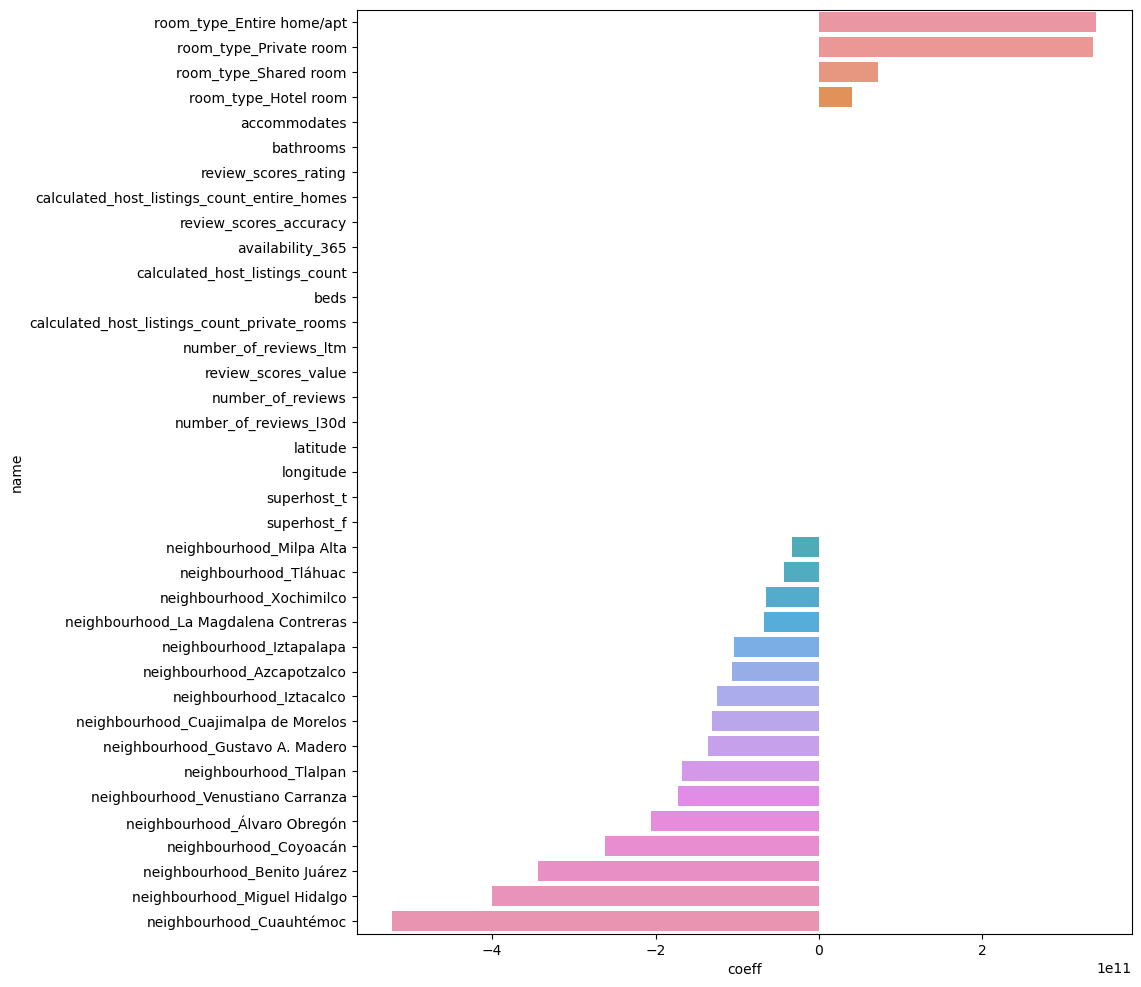

In [2051]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])